In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno

In [31]:
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

plt.rc('font',family= 'Malgun Gothic')  # 한글깨짐방지 두줄.
plt.rc('axes',unicode_minus=False)


# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [32]:
df=pd.read_csv("../input/서울특별시 학원 교습소정보.csv",low_memory=False,encoding='cp949')

In [34]:
df.shape

(25032, 22)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25032 entries, 0 to 25031
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   행정구역명       24973 non-null  object 
 1   학원/교습소      25032 non-null  object 
 2   학원지정번호      25032 non-null  int64  
 3   학원명         25032 non-null  object 
 4   도로명주소       25019 non-null  object 
 5   도로명상세주소     24925 non-null  object 
 6   분야명         25032 non-null  object 
 7   교습계열명       24589 non-null  object 
 8   교습과정목록명     17565 non-null  object 
 9   교습과정명       24591 non-null  object 
 10  정원합계        25032 non-null  int64  
 11  일시수용능력인원합계  24965 non-null  float64
 12  인당수강료내용     4220 non-null   object 
 13  수강료공개여부     23582 non-null  object 
 14  기숙사학원여부     22825 non-null  object 
 15  도로명우편번호     25031 non-null  float64
 16  등록상태명       25032 non-null  object 
 17  등록일자        25032 non-null  int64  
 18  휴원시작일자      340 non-null    float64
 19  휴원종료일자      340 non-null 

In [36]:
df.head(3)

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,동대문구,학원,1000000043,도우리이용기술학원,서울특별시 동대문구 왕산로33길 32,/ 2층 (제기동),직업기술,산업응용기술,이?미용/,이?미용,...,NaN,Y,N,130862.0,개원,19670209,NaN,NaN,19670209,20210627
1,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,/ 5층2호?5층6호?5층7호 중 일부(B호) (청량리동/ 미주상가),종합(대),NaN,전산회계/컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,NaN,...,NaN,Y,N,2490.0,개원,19681227,NaN,NaN,19681227,20210627
2,동대문구,학원,1000000083,국제전자과학학원,서울특별시동대문구 고산자로36길3,3층일부(제기동),직업기술,산업기반기술,전자/,전자,...,NaN,Y,N,130865.0,개원,19680210,NaN,NaN,19680210,20210627


<AxesSubplot:>

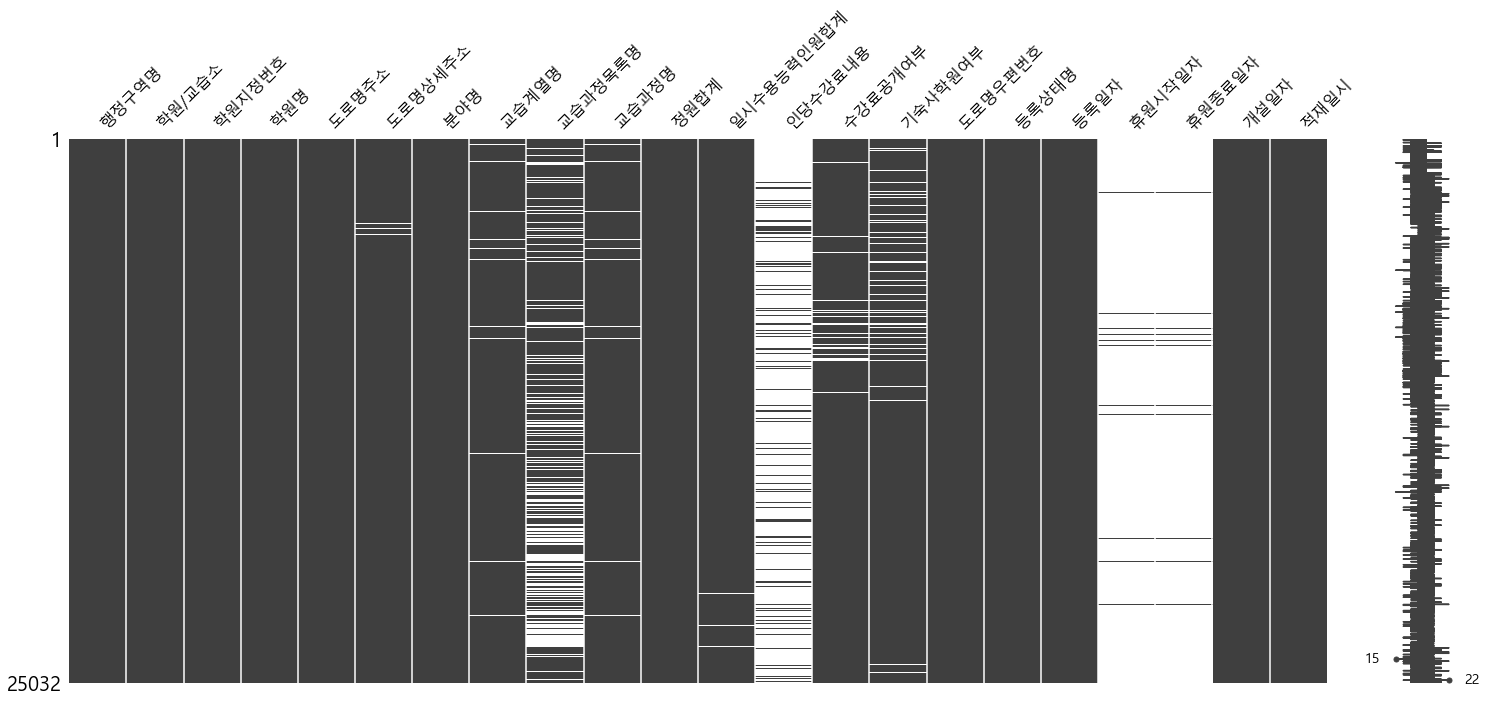

In [37]:
missingno.matrix(df)

In [38]:
df['교습과정목록명'].isnull().sum()

7467

In [25]:
df.isnull().sum()

행정구역명            59
학원/교습소            0
학원지정번호            0
학원명               0
도로명주소            13
도로명상세주소         107
분야명               0
교습계열명           443
교습과정목록명        7467
교습과정명           441
정원합계              0
일시수용능력인원합계       67
인당수강료내용       20812
수강료공개여부        1450
기숙사학원여부        2207
도로명우편번호           1
등록상태명             0
등록일자              0
휴원시작일자        24692
휴원종료일자        24692
개설일자              0
적재일시              0
dtype: int64

In [50]:
drop_column=df[['인당수강료내용','휴원시작일자','휴원종료일자']]

df = df.drop(drop_column,axis=1)

In [56]:
df.shape

(25032, 19)

In [57]:
df.head(1)

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,정원합계,일시수용능력인원합계,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,개설일자,적재일시
0,동대문구,학원,1000000043,도우리이용기술학원,서울특별시 동대문구 왕산로33길 32,/ 2층 (제기동),직업기술,산업응용기술,이?미용/,이?미용,40,20.0,Y,N,130862.0,개원,19670209,19670209,20210627


In [63]:
df['교습과정목록명'].unique()

array(['이?미용/', '전산회계/컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/', '전자/', ...,
       '보습/진학상담지도/실용외국어(유아/초?중?고)/', '피아노-바이엘', '논술기초A'], dtype=object)

In [64]:
df['교습과정목록명'].nunique()

3093

<AxesSubplot:>

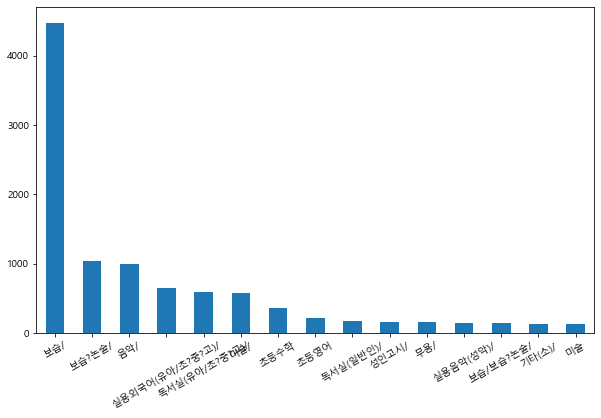

In [76]:
df_gyo=df['교습과정목록명'].value_counts(ascending=False).head(15)


plt.figure(figsize=(10,6))
df_gyo.plot.bar(rot=30)

In [84]:
df['도로명주소'].str.contains('마포').sum()

1106

In [98]:
df['도로명주소'].isnull().sum()

13

In [103]:
df['도로명주소'].fillna('0',inplace=True)

In [104]:
df['도로명주소'].isnull().sum()

0

In [107]:
df_mapo = df[df['도로명주소'].str.contains('마포')]

In [109]:
df_mapo['분야명'].unique()

array(['직업기술', '예능(대)', '독서실', '입시.검정 및 보습', '기타(대)', '인문사회(대)', '국제화',
       '종합(대)', '기예(대)'], dtype=object)

In [115]:
df_mapo[df_mapo['교습과정명']=='음악'].head(1)

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,정원합계,일시수용능력인원합계,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,개설일자,적재일시
95,마포구,학원,1000003731,엠앤엠이화음악학원,서울특별시 마포구 월드컵로25길 98,/ 2층 (망원동),예능(대),예능(중),음악/,음악,145,26.0,Y,N,3959.0,개원,19710508,19710508,20210627


In [118]:
df_mapo_music = df_mapo[df_mapo['교습과정명']=='음악']
df_mapo_music.shape

(142, 19)

In [127]:
df_ma_jung=df_mapo_music['정원합계'].sort_values(ascending=False).head(15)

22312    1998
14087     300
23145     228
185       222
8423      180
23215     165
15809     165
11453     156
95        145
1967      125
17041     120
3505      120
17995     120
23089     108
152       100
Name: 정원합계, dtype: int64

<AxesSubplot:>

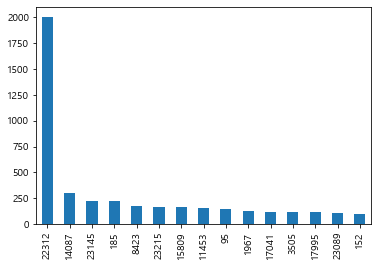

In [126]:
df_ma_jung.plot.bar()

In [132]:
df_mapo_music['도로명상세주소']

95                            / 2층 (망원동)
97                              2층 (서교동)
118                             2층 (망원동)
122                             2층 (창전동)
152                           2.3층 (망원동)
                      ...               
24296                           3층 (용강동)
24723                 태영아파트 남상가103호(대흥동)
24831                            3층(창전동)
24902                         / 1층 (아현동)
25006    도화3지구우성@18동 우성A상가 207/208호(도화동)
Name: 도로명상세주소, Length: 142, dtype: object

In [135]:
df_mangwon=df_mapo_music[df_mapo_music['도로명상세주소'].str.contains('망원',na=False)]

In [137]:
df_mangwon

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,정원합계,일시수용능력인원합계,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,개설일자,적재일시
95,마포구,학원,1000003731,엠앤엠이화음악학원,서울특별시 마포구 월드컵로25길 98,/ 2층 (망원동),예능(대),예능(중),음악/,음악,145,26.0,Y,N,3959.0,개원,19710508,19710508,20210627
118,마포구,학원,1000004896,벨라뮤직아카데미음악학원,서울특별시 마포구 망원로 57,2층 (망원동),예능(대),예능(중),음악/,음악,40,60.0,N,N,121823.0,개원,19890722,19890722,20210627
152,마포구,학원,1000006810,새우리피아노학원,서울특별시 마포구 방울내로 41,2.3층 (망원동),예능(대),예능(중),음악/,음악,100,52.0,N,N,121824.0,개원,19921126,19921126,20210627
1967,마포구,학원,11860,이제이음악학원,서울특별시 마포구 월드컵로25길 99,2층 (망원동),예능(대),예능(중),음악/,음악,125,30.0,N,N,121823.0,개원,20051117,20051117,20210627
5098,마포구,교습소,22091,슈만과피아노여행음악교습소,서울특별시 마포구 월드컵로31길 85,/ 1층 일부(우측) (망원동/ 명남아띠),예능(대),예능(중),피아노 초급,음악,15,6.0,Y,N,3960.0,개원,20080910,20080910,20210627
5834,마포구,교습소,25002,임마누엘음악교습소,서울특별시 마포구 방울내로5길 38,1층일부101호 (망원동),예능(대),예능(중),초급피아노,음악,16,4.0,Y,N,3955.0,개원,20090803,20090803,20210627
6654,마포구,교습소,27640,제이음악교습소,서울특별시 마포구 월드컵로25길 99,1층일부 (망원동),예능(대),예능(중),초급,음악,20,4.0,N,N,3958.0,개원,20100219,20100219,20210627
6739,마포구,교습소,27905,안단테음악교습소,서울특별시 마포구 월드컵로25길 70,2층 (망원동),예능(대),예능(중),초급피아노,음악,21,7.0,N,N,3959.0,개원,20100305,20100305,20210627
8005,마포구,교습소,3000012144,브람스음악교습소,서울특별시 마포구 월드컵로25길 26,마포영화블렌하임104동12-3호13-1호 (망원동),예능(대),예능(중),피아노고급1,음악,30,5.0,NaN,N,3964.0,개원,20110927,20110927,20210627
11294,마포구,교습소,3000021231,통기타스테이션음악교습소,서울특별시 마포구 월드컵로31길 102,/ 1층 101호 (망원동/ 정윤빌라),예능(대),예능(중),고급,음악,7,2.0,Y,N,3955.0,개원,20141010,20141010,20210627


## 0805~  진행중..